In [1]:
import sys
sys.path.append(r'C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\AstroStatistics\ML\GammaRayBursts\Utilities')
import utils
import plot_settings

In [2]:
url = 'https://user-web.icecube.wisc.edu/~grbweb_public/Summary_table.txt'
raw, names = utils.read_data(url)

C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\AstroStatistics\ML\GammaRayBursts\Utilities\utils.py:22: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  raw = np.loadtxt("Summary_table.txt", dtype='str',unpack='True')


In [3]:
T90, fluence = zip(*[(float(a), float(b)) for a, b in zip(raw[6], raw[9]) 
                                           if a != '-999' and b != '-999' 
                                           and float(b)!=0 and float(a) != 0
                                           ])

In [7]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Log(T90) [secs]')

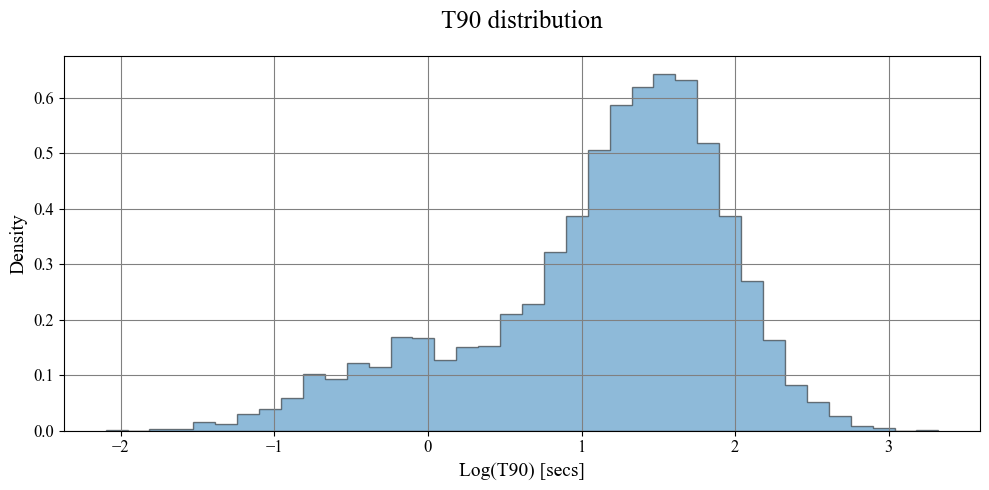

In [10]:
counts, bins , _ = plt.hist(np.log10(T90), bins='scott', density=True, histtype='stepfilled', alpha=0.5, edgecolor='black')
plt.title('T90 distribution')
plt.ylabel('Density')
plt.xlabel(r'Log(T90) [secs]')

In [12]:
from sklearn.neighbors import KernelDensity

In [13]:
def kde_sklearn(data, xgrid, bandwidth, kernel="gaussian"):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf)